In [58]:
import numpy as np
import pandas as pd
from icecream import ic
from matplotlib import pyplot as plt
from sklearn.model_selection import (
    cross_val_score,
    GridSearchCV,
    train_test_split,
)
from sklearn.linear_model import LinearRegression
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestClassifier, RandomForestRegressor

# DATA 607 - Machine Learning

## Class 7 &mdash; 2025.05.14 &mdash; Boosting

### Random forest classifiers

In [ ]:
df = pd.read_csv("~/.kaggle/data/fashionmnist/fashion-mnist_train.csv")
y = df["label"]
X = df.iloc[:, 1:]
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2)
ic(len(X_train), len(X_test))

ic| len(X_train): 48000, len(X_test): 12000


In [ ]:
model = RandomForestClassifier(
    n_estimators=200, max_features="sqrt", max_samples=20_000, n_jobs=-1
)
scores = cross_val_score(model, X_train, y_train, scoring="accuracy")
ic(scores.mean(), scores.std())

ic| scores.mean(): np.float64(0.8733333333333334)
    scores.std(): np.float64(0.005790767316263986)


In [ ]:
model = RandomForestClassifier(
    n_estimators=200, max_features="sqrt", max_samples=20_000
)
scores = cross_val_score(model, X_train, y_train, scoring="accuracy")
ic(scores.mean(), scores.std())

ic| scores.mean(): np.float64(0.8745416666666668)
    scores.std(): np.float64(0.00195056081679091)


### Boosting

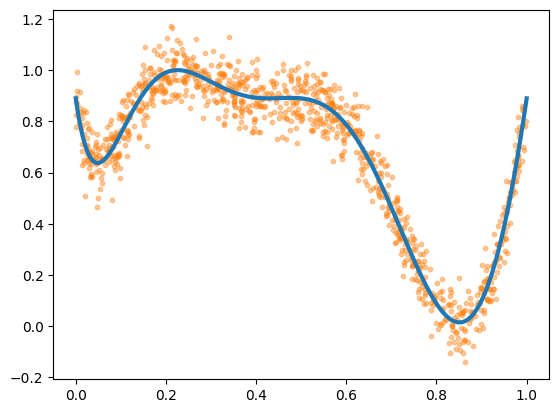

In [18]:
def f(x):
    c = np.array(
        [
            8.89790000e-01,
            -1.24853715e01,
            2.00598302e02,
            -1.20027425e03,
            3.59728524e03,
            -5.91118526e03,
            5.35786134e03,
            -2.49811475e03,
            4.66314753e02,
        ]
    )
    return sum(ci * x**i for i, ci in enumerate(c))


n = 1000
scale = 0.07
n_estimators = 10000

rng = np.random.default_rng()
x_train = rng.uniform(size=n)
X_train = x_train.reshape(-1, 1)
e_train = rng.normal(scale=scale, size=n)
y_train = f(x_train) + e_train

x_test = np.linspace(0, 1, 1000)
X_test = x_test.reshape(-1, 1)
e_test = rng.normal(scale=scale, size=n)
y_test = f(x_test) + e_train

plt.plot(x_test, f(x_test), lw=3)
plt.scatter(x_train, y_train, s=10, c="C1", alpha=0.4)
plt.show()

### Boosting linear regression doesn't work.

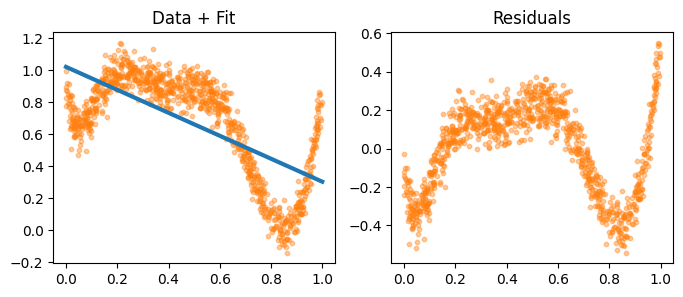

In [23]:
model = LinearRegression()
model.fit(X_train, y_train)
r = y_train - model.predict(X_train)
fig, (a0, a1) = plt.subplots(nrows=1, ncols=2, figsize=(8, 3))
a0.scatter(x_train, y_train, s=10, c="C1", alpha=0.4)
a0.plot(x_test, model.predict(X_test), lw=3)
a0.set_title("Data + Fit")
a1.scatter(x_train, r, s=10, c="C1", alpha=0.4)
a1.set_title("Residuals")
plt.show()

In [ ]:
model1 = LinearRegression()
model1.fit(X_train, r)
ic(model1.intercept_.item(), model1.coef_.item())

ic| model1.intercept_.item(): 2.0278904722557088e-16
    model1.coef_.item(): -1.2577430025481064e-16


### Boosting decision trees

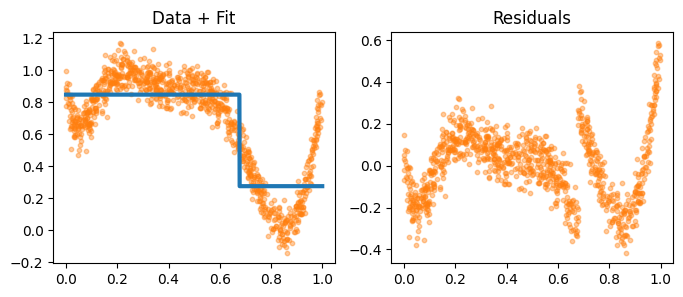

In [29]:
model = DecisionTreeRegressor(max_depth=1)
model.fit(X_train, y_train)
r = y_train - model.predict(X_train)
fig, (a0, a1) = plt.subplots(nrows=1, ncols=2, figsize=(8, 3))
a0.scatter(x_train, y_train, s=10, c="C1", alpha=0.4)
a0.plot(x_test, model.predict(X_test), lw=3)
a0.set_title("Data + Fit")
a1.scatter(x_train, r, s=10, c="C1", alpha=0.4)
a1.set_title("Residuals")
plt.show()

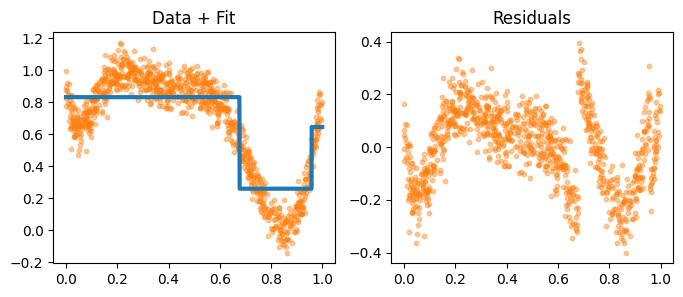

In [31]:
model1 = DecisionTreeRegressor(max_depth=1)
model1.fit(X_train, r)
r = r - model1.predict(X_train)
fig, (a0, a1) = plt.subplots(nrows=1, ncols=2, figsize=(8, 3))
a0.scatter(x_train, y_train, s=10, c="C1", alpha=0.4)
a0.plot(x_test, model.predict(X_test) + model1.predict(X_test), lw=3)
a0.set_title("Data + Fit")
a1.scatter(x_train, r, s=10, c="C1", alpha=0.4)
a1.set_title("Residuals")
plt.show()

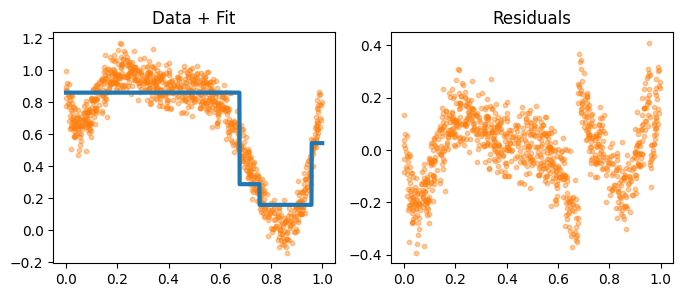

In [ ]:
model2 = DecisionTreeRegressor(max_depth=1)
model2.fit(X_train, r)
r = r - model2.predict(X_train)
fig, (a0, a1) = plt.subplots(nrows=1, ncols=2, figsize=(8, 3))
a0.scatter(x_train, y_train, s=10, c="C1", alpha=0.4)
a0.plot(
    x_test,
    model.predict(X_test) + model1.predict(X_test) + model2.predict(X_test),
    lw=3,
)
a0.set_title("Data + Fit")
a1.scatter(x_train, r, s=10, c="C1", alpha=0.4)
a1.set_title("Residuals")
plt.show()

In [35]:
r = y_train.copy()
models = []
n_estimators = 100
for i in range(n_estimators):
    model = DecisionTreeRegressor(max_depth=1)
    models.append(model)
    model.fit(X_train, r)
    r -= model.predict(X_train)

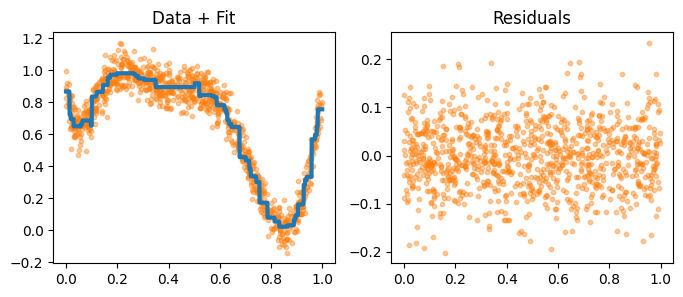

In [39]:
model2 = DecisionTreeRegressor(max_depth=1)
model2.fit(X_train, r)
r = r - model2.predict(X_train)
fig, (a0, a1) = plt.subplots(nrows=1, ncols=2, figsize=(8, 3))
a0.scatter(x_train, y_train, s=10, c="C1", alpha=0.4)
preds = sum([model.predict(X_test) for model in models])
a0.plot(x_test, preds, lw=3)
a0.set_title("Data + Fit")
a1.scatter(x_train, r, s=10, c="C1", alpha=0.4)
a1.set_title("Residuals")
plt.show()

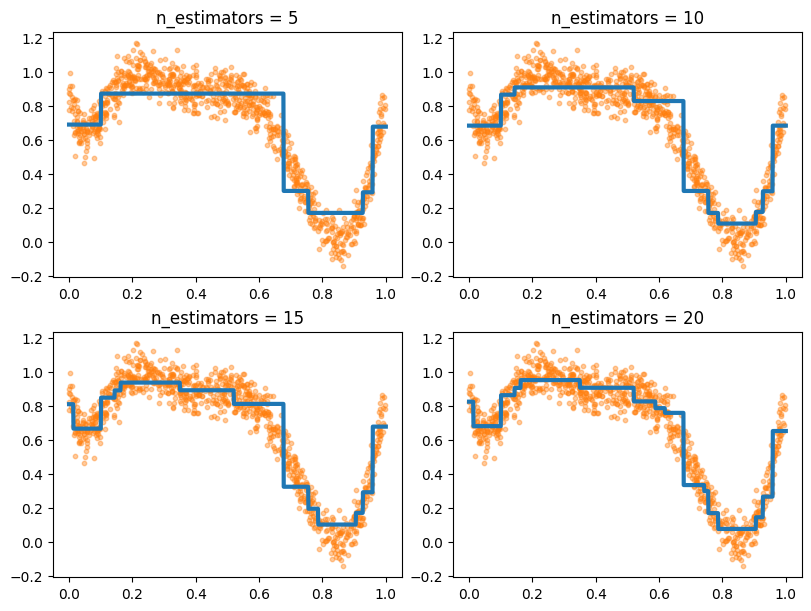

In [ ]:
fig, axes = plt.subplots(nrows=2, ncols=2, figsize=(8, 6), layout="constrained")
for k, ax in zip([5, 10, 15, 20], axes.ravel()):
    ax.scatter(x_train, y_train, s=10, c="C1", alpha=0.4)
    preds = sum([model.predict(X_test) for model in models[:k]])
    ax.plot(x_test, preds, lw=3)
    ax.set_title(f"n_estimators = {k}")

In [ ]:
from sklearn.base import BaseEstimator
from sklearn.utils import check_array, check_X_y
from sklearn.utils.validation import check_is_fitted


class NaiveBoosting(BaseEstimator):
    def __init__(self, n_estimators=100, max_depth=1):
        self.n_estimators = n_estimators
        self.max_depth = max_depth

    def fit(self, X, y):
        check_X_y(X, y)
        r = y.copy()
        self.estimators_ = []
        for _ in range(self.n_estimators):
            model = DecisionTreeRegressor(max_depth=self.max_depth)
            self.estimators_.append(model)
            model.fit(X, r)
            r -= model.predict(X)

    def predict(self, X):
        check_array(X)
        check_is_fitted(self)
        return sum([e.predict(X) for e in self.estimators_])

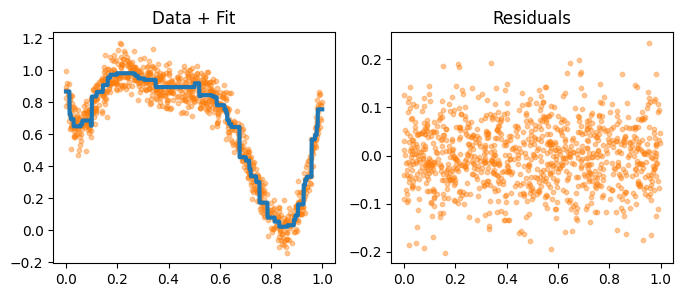

In [69]:
model = NaiveBoosting()
model.fit(X_train, y_train)

fig, (a0, a1) = plt.subplots(nrows=1, ncols=2, figsize=(8, 3))
a0.scatter(x_train, y_train, s=10, c="C1", alpha=0.4)
a0.plot(x_test, model.predict(X_test), lw=3)
a0.set_title("Data + Fit")
a1.scatter(x_train, y_train - model.predict(X_train), s=10, c="C1", alpha=0.4)
a1.set_title("Residuals")
plt.show()

In [81]:
param_grid = {"max_depth": [1, 3, 5]}

search = GridSearchCV(NaiveBoosting(), param_grid, scoring="neg_mean_squared_error")
search.fit(X_train, y_train)
pd.DataFrame(search.cv_results_)

,mean_fit_time,std_fit_time,mean_score_time,std_score_time,param_max_depth,params,split0_test_score,split1_test_score,split2_test_score,split3_test_score,split4_test_score,mean_test_score,std_test_score,rank_test_score
0,0.033891,0.020785,0.004252,0.000121,1,{'max_depth': 1},-0.005856,-0.005889,-0.006836,-0.005022,-0.006374,-0.005995,0.000605,1
1,0.030978,0.000489,0.004253,0.000056,3,{'max_depth': 3},-0.008690,-0.009128,-0.009007,-0.009334,-0.009977,-0.009227,0.000429,2
2,0.039685,0.000573,0.004383,0.000183,5,{'max_depth': 5},-0.009523,-0.009936,-0.009662,-0.010019,-0.010524,-0.009933,0.000346,3


### Question about what noise "looks like"

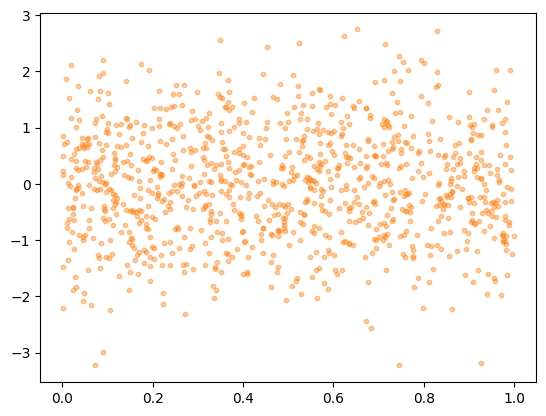

In [84]:
noise = np.random.normal(size=x_train.size)
plt.scatter(x_train, noise, s=10, c="C1", alpha=0.4)
plt.show()

### Gradient Boosting

- Suppose we've fit a model $F_0$ to the training data. How might we improve it (***boost*** its performance)?

- Let $L$ be the relevant loss function.

- For ***small adjustments*** $h$,
  $$
  L(F_0 + h) \approx L(F_0) + \left.\frac{\partial L}{\partial F}\right|_{F=F_0}h.
  $$

  - This is ***calculus***; more precisely, ***first-order approximation***.

  - $\displaystyle \left.\frac{\partial L}{\partial F}\right|_{F=F_0}$ is called ***the gradient of $L$ at $F=F_0$***.

- If $\varepsilon$ is a sufficiently small positive number and we set
  $$
  h = -\varepsilon \left.\frac{\partial L}{\partial F}\right|_{F=F_0},
  $$
  then $h$ is a small adjustment, in which case
  $$
  L(F_0 + h) \approx L(F_0)  -\varepsilon \left(\left.\frac{\partial L}{\partial F}\right|_{F=F_0}\right)^2 < L(F_0).
  $$

- Thus, $F_1=F_0 + h$ has smaller training loss that $F_0$.

- Decreasing training loss by adjusting a model along the negative gradient of the loss is called ***gradient descent***. The negative of the gradient of a function points in its direction of ***steepest descent***.

In [ ]:
# Add in the learning rate


class NaiveBoosting(BaseEstimator):
    def __init__(self, n_estimators=100, max_depth=1, learning_rate=1.0):
        self.n_estimators = n_estimators
        self.max_depth = max_depth
        self.learning_rate = learning_rate

    def fit(self, X, y):
        check_X_y(X, y)
        r = y.copy()
        self.estimators_ = []
        for i in range(self.n_estimators):
            model = DecisionTreeRegressor(max_depth=self.max_depth)
            self.estimators_.append(model)
            model.fit(X, r)
            r -= (1 if i == 0 else self.learning_rate) * model.predict(X)

    def predict(self, X):
        check_array(X)
        check_is_fitted(self)
        return sum(
            [
                (1 if i == 0 else self.learning_rate) * e.predict(X)
                for (i, e) in enumerate(self.estimators_)
            ]
        )

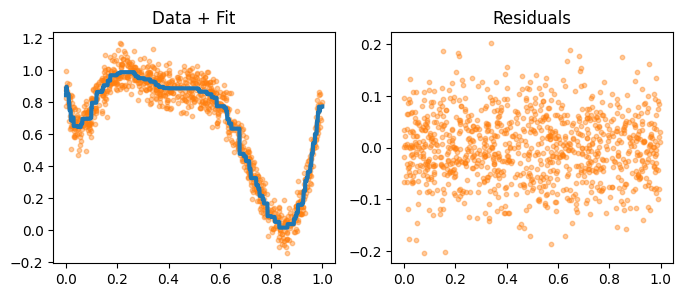

In [ ]:
model = NaiveBoosting(n_estimators=2000, learning_rate=0.1)
model.fit(X_train, y_train)

fig, (a0, a1) = plt.subplots(nrows=1, ncols=2, figsize=(8, 3))
a0.scatter(x_train, y_train, s=10, c="C1", alpha=0.4)
a0.plot(x_test, model.predict(X_test), lw=3)
a0.set_title("Data + Fit")
a1.scatter(x_train, y_train - model.predict(X_train), s=10, c="C1", alpha=0.4)
a1.set_title("Residuals")
plt.show()

### Boosting estimators

In [99]:
from sklearn.ensemble import GradientBoostingRegressor

df = pd.read_csv("data/auto_preprocessed.csv")
y = df.iloc[:, 0]
X = df.iloc[:, 1:]

In [104]:
cross_val_score(
    GradientBoostingRegressor(n_estimators=700, learning_rate=0.02, max_features=2),
    X,
    y,
    scoring="neg_mean_squared_error",
).mean()

np.float64(-7.574229185062142)

In [ ]:
model = GradientBoostingRegressor(
    n_estimators=700, learning_rate=0.02, max_features=2, n_iter_no_change=10
)
model.fit(X, y)

GradientBoostingRegressor(learning_rate=0.02, max_features=2, n_estimators=700,
                          n_iter_no_change=10)

In [118]:
from sklearn.datasets import fetch_california_housing

X, y = fetch_california_housing(return_X_y=True, as_frame=True)

display(X.head())

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2)

,MedInc,HouseAge,AveRooms,AveBedrms,Population,AveOccup,Latitude,Longitude
0,8.3252,41.0,6.984127,1.023810,322.0,2.555556,37.88,-122.23
1,8.3014,21.0,6.238137,0.971880,2401.0,2.109842,37.86,-122.22
2,7.2574,52.0,8.288136,1.073446,496.0,2.802260,37.85,-122.24
3,5.6431,52.0,5.817352,1.073059,558.0,2.547945,37.85,-122.25
4,3.8462,52.0,6.281853,1.081081,565.0,2.181467,37.85,-122.25


In [135]:
model = model = GridSearchCV(
    RandomForestRegressor(n_jobs=-1), param_grid={}, scoring="neg_mean_squared_error"
)
model.fit(X_train, y_train)

ic(model.best_score_)

ic| model.best_score_: np.float64(-0.26646729521831436)


np.float64(-0.26646729521831436)

In [136]:
from sklearn.ensemble import HistGradientBoostingRegressor

model = model = GridSearchCV(
    GradientBoostingRegressor(n_estimators=200),
    param_grid={"learning_rate": [0.01, 0.1, 1.0]},
    scoring="neg_mean_squared_error",
)
model.fit(X_train, y_train)

ic(model.best_params_, model.best_score_)

ic| model.best_params_: {'learning_rate': 0.1}
    model.best_score_: np.float64(-0.2597999432666894)


({'learning_rate': 0.1}, np.float64(-0.2597999432666894))

In [137]:
model = model = GridSearchCV(
    HistGradientBoostingRegressor(max_iter=200),
    param_grid={"learning_rate": [0.01, 0.1, 1.0]},
    scoring="neg_mean_squared_error",
)
model.fit(X_train, y_train)

ic(model.best_params_, model.best_score_)

ic| model.best_params_: {'learning_rate': 0.1}
    model.best_score_: np.float64(-0.215822147115487)


({'learning_rate': 0.1}, np.float64(-0.215822147115487))

In [138]:
from xgboost import XGBRegressor

model = model = GridSearchCV(
    XGBRegressor(n_estimators=200),
    param_grid={"learning_rate": [0.01, 0.1, 1.0]},
    scoring="neg_mean_squared_error",
)
model.fit(X_train, y_train)

ic(model.best_params_, model.best_score_)

ic| model.best_params_: {'learning_rate': 0.1}
    model.best_score_: np.float64(-0.2186302446584671)


({'learning_rate': 0.1}, np.float64(-0.2186302446584671))

In [139]:
from lightgbm import LGBMRegressor

model = model = GridSearchCV(
    LGBMRegressor(n_estimators=200, force_col_wise=True, verbose=0),  # type: ignore
    param_grid={"learning_rate": [0.01, 0.1, 1.0]},
    scoring="neg_mean_squared_error",
)
model.fit(X_train, y_train)

ic(model.best_params_, model.best_score_)

ic| model.best_params_: {'learning_rate': 0.1}
    model.best_score_: np.float64(-0.2130512163082931)


({'learning_rate': 0.1}, np.float64(-0.2130512163082931))